In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['legend.title_fontsize'] = 11
mpl.rcParams['legend.fontsize'] = 11
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11


Pie charts showing the composition of dataset. 

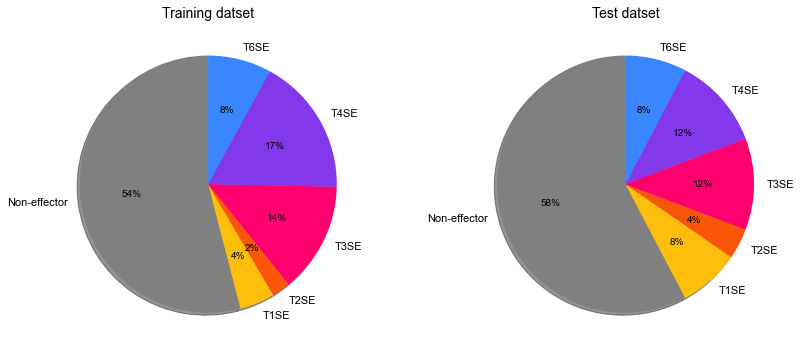

In [2]:
labels = ['Non-effector', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE']
colors = ['#808080', '#ffbe0b', '#fb5607', '#ff006e', '#8338ec', '#3a86ff']
train_fracs = [1577, 128, 68, 406, 507, 232]
test_fracs = [150, 20, 10, 30, 30, 20]

# Make figure and axes
fig, axs = plt.subplots(1, 2, figsize =(12, 5))

axs[0].pie(train_fracs, labels=labels, autopct='%.0f%%', colors = colors,
           shadow=True, startangle=90)
axs[0].set_title('Training datset')
axs[1].pie(test_fracs, labels=labels, autopct='%.0f%%', shadow=True,
           startangle=90, colors=colors)
axs[1].set_title('Test datset')

plt.tight_layout()

plt.savefig("pdf/data_composition.pdf")


Read the lengths of sequences in the dataset. 

In [3]:
from Bio import SeqIO

labels = []
lengths = []

for record in SeqIO.parse('data/Train-2918.fasta', 'fasta'):
    label = '-'.join(record.id.split('-')[:-1])
    labels.append(label)
    lengths.append(len(record))
    
df = pd.DataFrame({'Type': labels, 'Length': lengths})


Plot length distribution of effector sequences in training data.

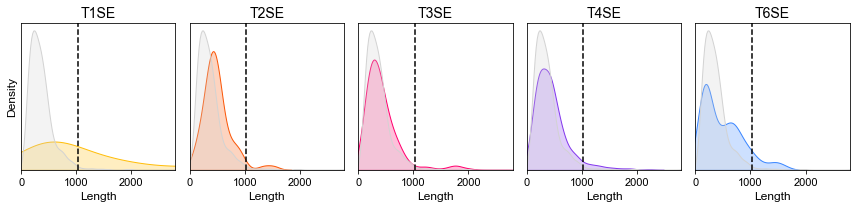

In [4]:
fig, axes = plt.subplots(1,5, figsize=(12,3))
colors = ['#808080', '#ffbe0b', '#fb5607', '#ff006e', '#8338ec', '#3a86ff']

for i, effector in enumerate(['T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE']):
    plot_df = df[df['Type'].isin(['Non-effector', effector])]
    color = ['lightgray', colors[i+1]]
    sns.kdeplot(data=plot_df, x="Length", hue="Type", legend=False, ax=axes[i], palette=sns.color_palette(color), shade=True, common_norm=False)
    axes[i].set_title(effector)
    axes[i].axvline(x=1022, linewidth=1.5, linestyle='--', color='black')
    axes[i].set_xlim([0, 2800])
    axes[i].set_yticks([])
    
    if i > 0:
        axes[i].set_ylabel('')
    
plt.tight_layout()

plt.savefig("pdf/length_dist_train.pdf")


Plot length distribution of effector sequences in test data.

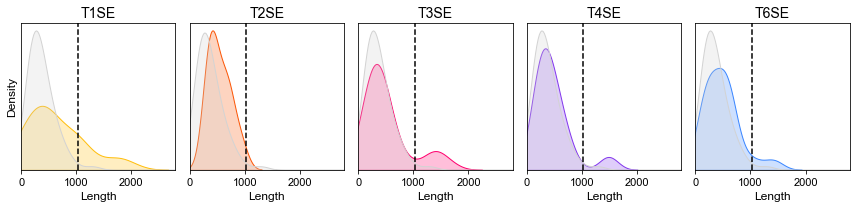

In [5]:
labels = []
lengths = []

for record in SeqIO.parse('data/Test-260.fasta', 'fasta'):
    label = '-'.join(record.id.split('-')[:-1])
    labels.append(label)
    lengths.append(len(record))
    
df = pd.DataFrame({'Type': labels, 'Length': lengths})

fig, axes = plt.subplots(1, 5, figsize=(12, 3))
colors = ['#808080', '#ffbe0b', '#fb5607', '#ff006e', '#8338ec', '#3a86ff']

for i, effector in enumerate(['T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE']):
    plot_df = df[df['Type'].isin(['Non-effector', effector])]
    color = ['lightgray', colors[i+1]]
    sns.kdeplot(data=plot_df, x="Length", hue="Type", legend=False,
                ax=axes[i], palette=sns.color_palette(color), shade=True, common_norm=False)
    axes[i].set_title(effector)
    axes[i].axvline(x=1022, linewidth=1.5, linestyle='--', color='black')
    axes[i].set_xlim([0, 2800])
    axes[i].set_yticks([])

    if i > 0:
        axes[i].set_ylabel('')

plt.tight_layout()

plt.savefig("pdf/length_dist_test.pdf")
